In [1]:
import os
import pandas as pd 


In [2]:
import os
import pandas as pd

def load_and_filter_data(data_path, check_cols):
    """
    Loads all *_solver_data.csv files from a directory, filters each based on changes
    in specific columns, logs processing details, and combines the filtered data.

    Parameters:
        data_path (str): Path to the directory containing CSV files.
        check_cols (list): List of columns to use for change detection.

    Returns:
        pd.DataFrame: Combined filtered DataFrame from all processed files.
    """
    all_filtered = []

    # Get all files ending with _solver_data.csv
    files = [f for f in os.listdir(data_path) if f.endswith("_solver_data.csv")]
    print(f"Found {len(files)} solver data files.")

    for file in files:
        file_path = os.path.join(data_path, file)
        try:
            df = pd.read_csv(file_path)
            original_shape = df.shape

            # Create mask for rows where values changed
            change_mask = df[check_cols].diff().abs().sum(axis=1) > 1e-4
            change_mask.iloc[0] = True  # Always keep the first row

            filtered_df = df[change_mask].reset_index(drop=True)
            filtered_shape = filtered_df.shape

            print(f"Processed '{file}': original = {original_shape}, filtered = {filtered_shape}")

            all_filtered.append(filtered_df)

        except Exception as e:
            print(f"Error processing '{file}': {e}")

    # Concatenate all filtered dataframes
    if all_filtered:
        combined_df = pd.concat(all_filtered, ignore_index=True)
        print(f"\nCombined filtered data shape: {combined_df.shape}")
    else:
        combined_df = pd.DataFrame()
        print("No data was loaded or filtered.")

    return combined_df



In [3]:
# Example usage
data_path = "results_20250817_195529"
check_cols = ['temperature', 'fuel_mass_fraction', 'o2', 'nc12h26']

filtered_combined_df = load_and_filter_data(data_path, check_cols)


Found 569 solver data files.
Processed 'nc12h26_500_5__0.5__0.008_solver_data.csv': original = (8000, 111), filtered = (1, 111)
Processed 'nc12h26_400_20__1.2__0.002_solver_data.csv': original = (2001, 111), filtered = (1, 111)
Processed 'nc12h26_300_5__1.5__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_500_1__0.8__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_300_20__1.8__0.008_solver_data.csv': original = (8000, 111), filtered = (1, 111)
Processed 'nc12h26_500_10__1.8__0.002_solver_data.csv': original = (2001, 111), filtered = (1, 111)
Processed 'nc12h26_400_1__0.1__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_300_5__0.1__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_400_2__1.5__0.008_solver_data.csv': original = (8000, 111), filtered = (1, 111)
Processed 'nc12h26_600_5__0.2__0.008_solver_data.csv': original = (8000, 111)

In [4]:
filtered_combined_df.to_csv("filtered_combined_df1.csv", index=False)

In [5]:
# Example usage
data_path = "results_20250818_074733"
check_cols = ['fuel_mass_fraction', 'o2', 'nc12h26']

filtered_combined_df2 = load_and_filter_data(data_path, check_cols)

Found 125 solver data files.
Processed 'nc12h26_800_1__0.2__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_900_2__1.5__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_800_1__1.5__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_800_1__0.01__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_800_10__0.8__0.005_solver_data.csv': original = (5000, 111), filtered = (331, 111)
Processed 'nc12h26_800_2__0.8__0.005_solver_data.csv': original = (5000, 111), filtered = (335, 111)
Processed 'nc12h26_900_2__0.8__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_700_10__1.8__0.005_solver_data.csv': original = (5000, 111), filtered = (562, 111)
Processed 'nc12h26_700_5__0.1__0.005_solver_data.csv': original = (5000, 111), filtered = (1, 111)
Processed 'nc12h26_800_2__0.01__0.005_solver_data.csv': original = (500

In [6]:
filtered_combined_df2.to_csv("filtered_combined_df2.csv", index=False)

In [7]:
filtered_combined_df2[['temperature', 'fuel_mass_fraction', 'o2', 'nc12h26', 'h2o', 'co2', 'co', 'best_method']].sample(20)

,temperature,fuel_mass_fraction,o2,nc12h26,h2o,co2,co,best_method
1257,804.442787,6.925232e-02,0.214145,6.933576e-02,0.000538,1.654107e-08,0.000021,0
6693,735.252193,3.772922e-02,0.210036,3.798426e-02,0.002743,4.648954e-07,0.000168,3
19807,719.175463,7.768340e-02,0.207163,7.786078e-02,0.001449,2.824561e-08,0.000031,0
16064,1198.790621,2.037352e-05,0.133321,2.224822e-05,0.038264,2.395166e-03,0.044025,0
15474,700.000000,6.283390e-02,0.218359,6.283390e-02,0.000000,0.000000e+00,0.000000,3
2604,801.805233,8.965979e-02,0.211170,8.973749e-02,0.000171,4.111592e-10,0.000004,1
18652,1210.799304,5.877693e-07,0.144986,6.360330e-07,0.035834,3.127684e-03,0.044772,0
10275,835.966313,7.327861e-02,0.197224,7.487429e-02,0.003592,7.821138e-07,0.000257,1
15770,801.371662,1.168481e-01,0.205020,1.169222e-01,0.000136,2.438200e-10,0.000003,1
18954,802.488332,4.810116e-03,0.230842,4.892586e-03,0.000194,1.891010e-08,0.000012,1


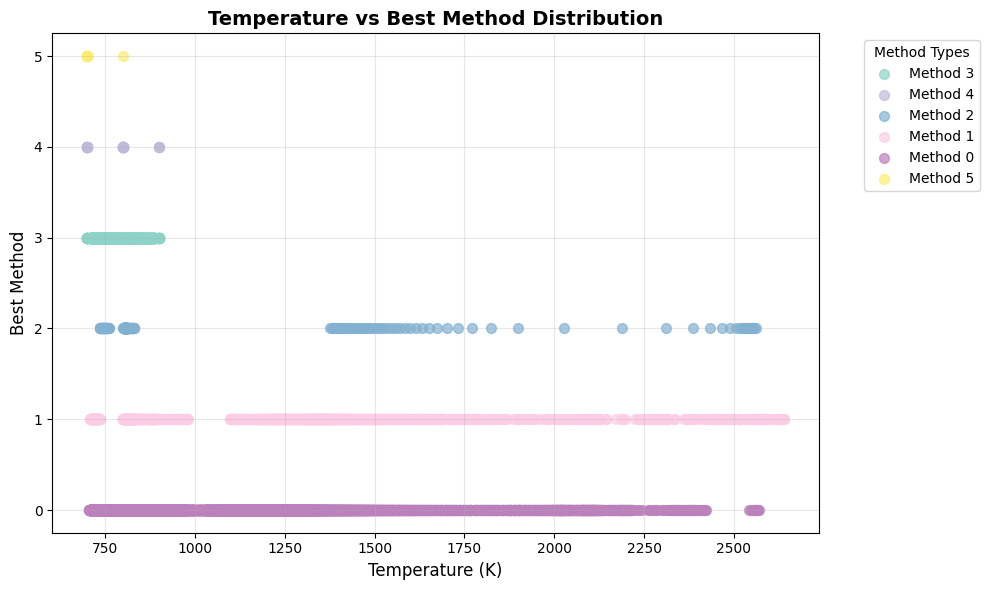

Total data points: 21463
Unique methods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Temperature range: 700.00K - 2639.36K

Method distribution:
best_method
0    16622
1     2079
2      275
3     2434
4       42
5       11
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for better-looking plots
plt.style.use('default')
sns.set_palette("husl")

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Get unique values in best_method for color coding
unique_methods = filtered_combined_df2['best_method'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_methods)))

# Create scatter plot with color coding
for i, method in enumerate(unique_methods):
    mask = filtered_combined_df2['best_method'] == method
    plt.scatter(filtered_combined_df2.loc[mask, 'temperature'], 
                filtered_combined_df2.loc[mask, 'best_method'],
                c=[colors[i]], 
                label=f'Method {method}',
                alpha=0.7,
                s=50)

# Customize the plot
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Best Method', fontsize=12)
plt.title('Temperature vs Best Method Distribution', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Method Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print(f"Total data points: {len(filtered_combined_df2)}")
print(f"Unique methods: {sorted(unique_methods)}")
print(f"Temperature range: {filtered_combined_df2['temperature'].min():.2f}K - {filtered_combined_df2['temperature'].max():.2f}K")
print("\nMethod distribution:")
print(filtered_combined_df2['best_method'].value_counts().sort_index())

In [9]:
def plot_temperature_vs_species(df, x_col='temperature', y_col='h2o', 
                                title='Temperature vs H2O (Colored by Best Method)',
                                xlabel='Temperature (K)', ylabel='H2O Mass Fraction'):
    """
    Create a scatter plot showing the relationship between two variables, colored by best method.
    
    Parameters:
    df: DataFrame containing the data
    x_col: column name for x-axis (default: 'temperature')
    y_col: column name for y-axis (default: 'h2o')
    title: plot title
    xlabel: x-axis label
    ylabel: y-axis label
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Set the style for better-looking plots
    plt.style.use('default')
    sns.set_palette("husl")

    # Create the scatter plot
    plt.figure(figsize=(10, 6))

    # Get unique values in best_method for color coding
    unique_methods = df['best_method'].unique()
    colors = plt.cm.Set3(np.linspace(0, 1, len(unique_methods)))

    # Create scatter plot with color coding
    for i, method in enumerate(unique_methods):
        mask = df['best_method'] == method
        plt.scatter(df.loc[mask, x_col], 
                    df.loc[mask, y_col],
                    c=[colors[i]], 
                    label=f'Method {method}',
                    alpha=0.7,
                    s=50)

    # Customize the plot
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Method Types', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print some statistics
    print(f"Total data points: {len(df)}")
    print(f"Unique methods: {sorted(unique_methods)}")
    print(f"{xlabel} range: {df[x_col].min():.2f} - {df[x_col].max():.2f}")
    if y_col == 'fuel_mass_fraction':
        print(f"{ylabel} range: {df[y_col].min():.2e} - {df[y_col].max():.2e}")
    else:
        print(f"{ylabel} range: {df[y_col].min():.2e} - {df[y_col].max():.2e}")
    print("\nMethod distribution:")
    print(df['best_method'].value_counts().sort_index())



In [10]:


# combine the two dataframes
combined_df = pd.concat([filtered_combined_df2, filtered_combined_df], ignore_index=True)

# save the combined dataframe

In [12]:
combined_df.to_csv('combined_df.csv', index=False)

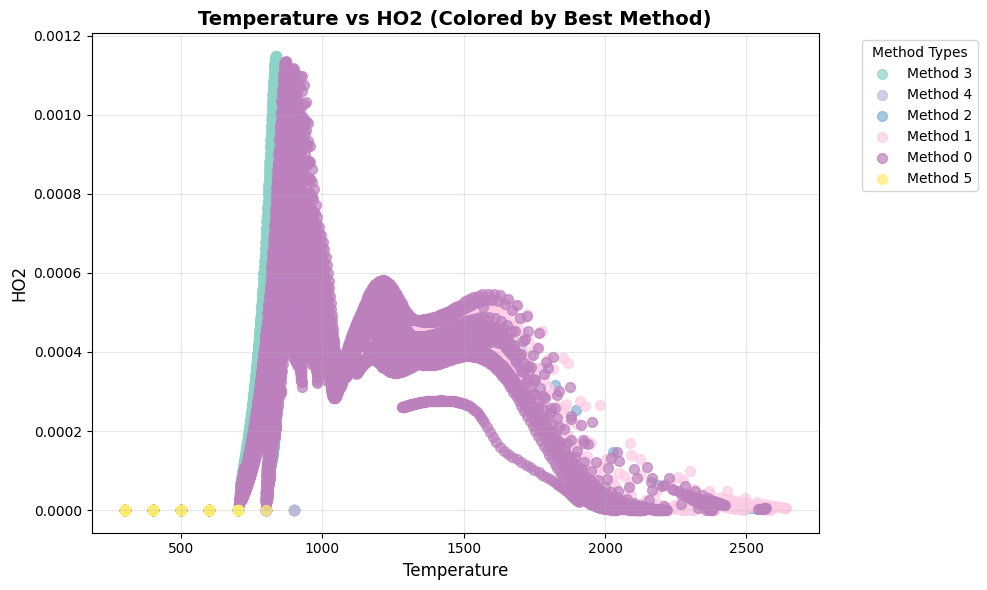

Total data points: 22031
Unique methods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Temperature range: 300.00 - 2639.36
HO2 range: 0.00e+00 - 1.15e-03

Method distribution:
best_method
0    16622
1     2079
2      275
3     2665
4      197
5      193
Name: count, dtype: int64


In [11]:

species_to_track = ['h', 'h2', 'o', 'o2', 'h2o', 'ho2', 'h2o2', 'oh']
# Call the function
plot_temperature_vs_species(combined_df, 
                           x_col='temperature',
                           y_col='ho2',
                           title='Temperature vs HO2 (Colored by Best Method)',
                           xlabel='Temperature',
                           ylabel='HO2')